In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras import Model

In [2]:
def inception_layer(x, filters):

    f1, f2_1, f2_2, f3_1, f3_2, f4 = filters

    x1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    x2 = Conv2D(f2_1, (1, 1), padding='same', activation='relu')(x)
    x2 = Conv2D(f2_2, (3, 3), padding='same', activation='relu')(x2)

    x3 = Conv2D(f3_1, (1, 1), padding='same', activation='relu')(x)
    x3 = Conv2D(f3_2, (5, 5), padding='same', activation='relu')(x3)

    x4 = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    x4 = Conv2D(f4, (1, 1), padding='same', activation='relu')(x4)

    output = concatenate([x1, x2, x3, x4], axis=3)

    return output

In [3]:
def InceptionNet(input_shape=(224,224,3), num_classes=10):
    x_input = Input(input_shape)

    x = UpSampling2D(size=(7,7))(x_input)

    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(x)
    x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
    x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
    x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)

    x = inception_layer(x, [64, 96, 128, 16, 32, 32])
    x = inception_layer(x, [128, 128, 192, 32, 96, 64])

    x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)

    x = inception_layer(x, [192, 96, 208, 16, 48, 64])

    x1 = AveragePooling2D(5, strides=3)(x)
    x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
    x1 = Flatten()(x1)
    x1 = Dense(1024, activation='relu')(x1)
    x1 = Dense(num_classes, activation='softmax')(x1)

    x = inception_layer(x, [160, 112, 224, 24, 64, 64])
    x = inception_layer(x, [128, 128, 256, 24, 64, 64])
    x = inception_layer(x, [112, 144, 288, 32, 64, 64])

    x2 = AveragePooling2D((5, 5), strides=3)(x)
    x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
    x2 = Flatten()(x2)
    x2 = Dense(1024, activation='relu')(x2)
    x2 = Dense(num_classes, activation='softmax')(x2)

    x = inception_layer(x, [256, 160, 320, 32, 128, 128])

    x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)

    x = inception_layer(x, [256, 160, 320, 32, 128, 128])
    x = inception_layer(x, [384, 192, 384, 48, 128, 128])
    x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=x_input, outputs=[x, x2, x1], name='InceptionNet')
    return model

In [4]:
model = InceptionNet()
model.summary()

Model: "InceptionNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 1568, 1568,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 784, 784, 64  9472        ['up_sampling2d[0][0]']          
                                )                                                      

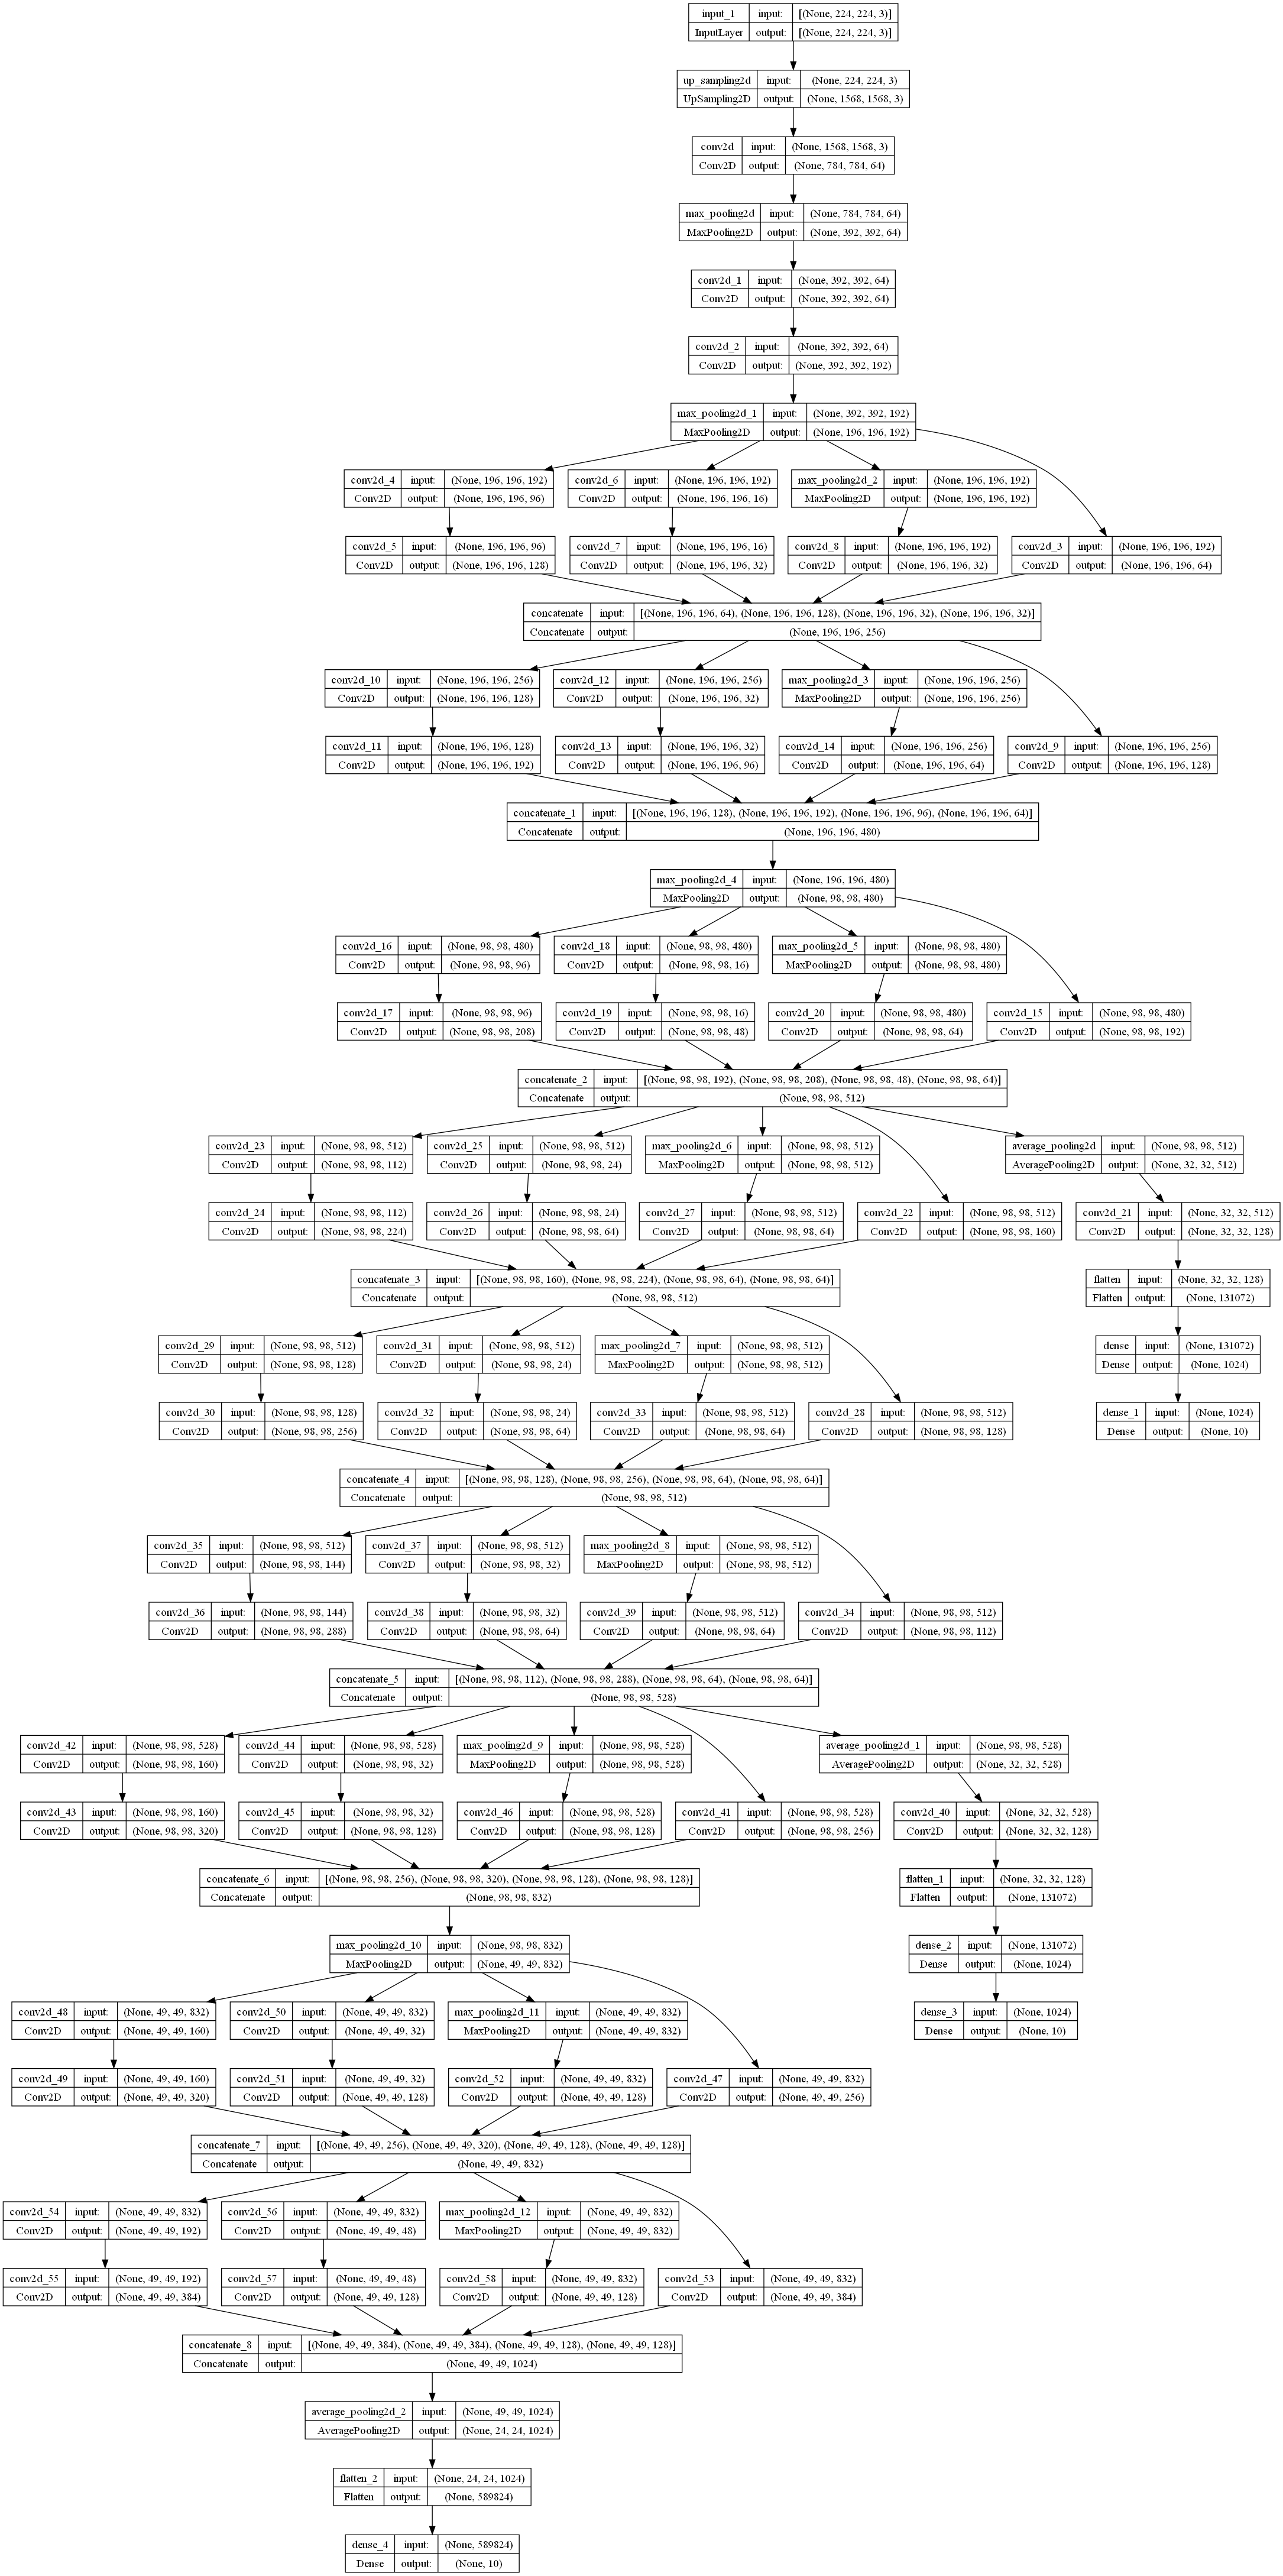

In [5]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)